# Table of Contents
 <p>

In this notebook, I will show that the transcripts in the *bx93*-associated class have expression levels that are significantly more altered in *sy622* homozygotes than in *bx93* homozygotes. I start by importing all the libraries and files.

In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# import own libraries
import epistasis as epi
import pretty_table as pretty

# plotting settings
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

# more parameters
mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

genmap = pd.read_csv('../sleuth/rna_seq_info.txt', sep=' ', comment='#')
tidy  = pd.read_csv('../output/dpy_22_results.csv')

I will extract the intersection between the transcripts that are differentially expressed in both the *bx93/bx93* and *sy622/sy622* genotypes. These transcripts are all, by definition contained within the *bx93*-associated class. The function to do that is defined in the cell below.

In [41]:
def get_x_and_y_from_df(overlap, df, strain1, strain2):
    x = tidy[(tidy.strain==strain1) & (tidy.target_id.isin(overlap))].b.values
    y = tidy[(tidy.strain==strain2) & (tidy.target_id.isin(overlap))].b.values

    se_x = tidy[(tidy.strain==strain1) & (tidy.target_id.isin(overlap))].se_b.values
    se_y = tidy[(tidy.strain==strain2) & (tidy.target_id.isin(overlap))].se_b.values
    
    return x, y, se_x, se_y

Let's go ahead and extract the relevant transcripts, and plot the results. I will also calculate the line of best fit for the results to get a sense for how much more perturbed the transcripts are in one genotype relative to the other.

The bx93 homozygote has an effect size 0.56x (+/- 0.018) relative to the sy622 homozygote


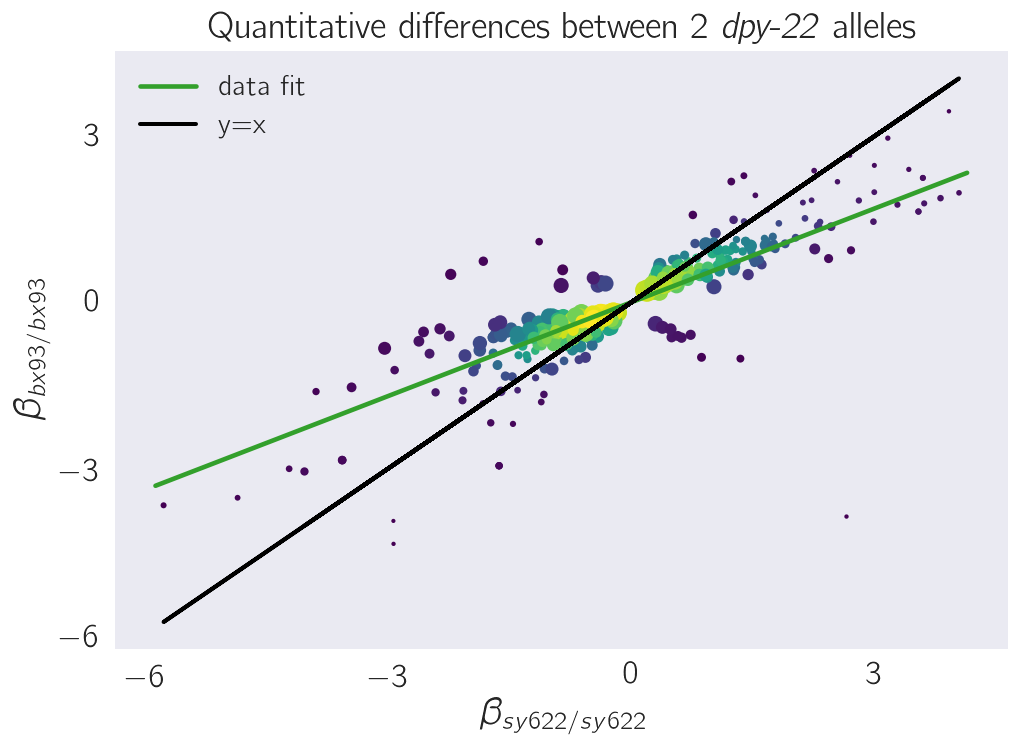

In [42]:
overlap = epi.find_overlap(['PS4087', 'PS4187'], tidy)
x, y, se_x, se_y = get_x_and_y_from_df(overlap, tidy, 'PS4087', 'PS4187')
odr = epi.perform_odr(x, y, se_x, se_y, beta0=[0.5])

epi.epiplot(x, y, se_y, s0=5, beta=odr.beta[0], alpha=1)
plt.plot(x, x, 'k', ls='-', label='y=x')

plt.legend()
plt.xlabel(r'$\beta_{sy622/sy622}$')
plt.ylabel(r'$\beta_{bx93/bx93}$')

plt.xticks([-6, -3, 0, 3])
plt.yticks([-6, -3, 0, 3])
plt.title('Quantitative differences between 2 \emph{dpy-22} alleles')

plt.savefig('../output/dpy22_strong_vs_weak_alleles.svg', bbox_inches='tight')

odr_m = '{0:.2g}x (+/- {1:.2g})'.format(odr.beta[0], odr.sd_beta[0])
print(r'The bx93 homozygote has an effect size ' + odr_m + ' relative to the sy622 homozygote')